# 活性化関数

- 活性化関数は、閾値を境にして出力が切り替わる関数
- パーセプトロンでは **「ステップ関数」** を使用
- ニューラルネットワークでは、様々な関数を使用して実現している。

## ステップ関数
- 0を境界にして、出力が0から1 or 1から0へ切り替わる
- 階段状に切り替わる形から「階段関数」とも呼ばれる。

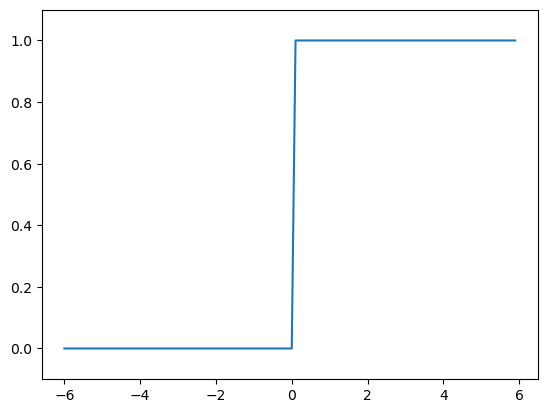

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    """
    if x > 0:  # numpy型を入れるとブーリアン値になってしまうので×
        return 1
    else:
        return 0
    """
    return np.array(x > 0, dtype=np.int32) # ブーリアン型からint型に変換

x = np.arange(-6.0, 6.0, 0.1)
y = step_function(x)
plt.plot(x, y, label='Step Function')
plt.ylim(-0.1, 1.1)  # y軸の範囲を指定
plt.show()


## シグモイド関数
- なめらかな曲線で、連続的に出力が変化  
--> この**なめらかさがニューラルネットワークの学習において重要**！！
- 入力信号が**重要な情報であれば大きな値**を返し、重要でなければ小さな出力する

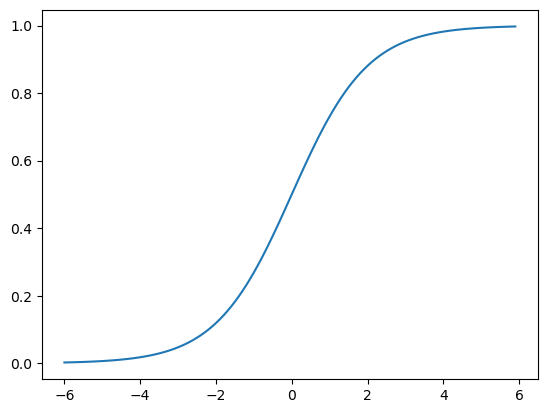

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-6.0, 6.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, label='Sigmoid')
plt.show()



## 非線形関数
- ステップ関数とシグモイド関数は、**非線形関数**である。
    - 線形関数とは？：  
    出力値が入力値の定数倍になるような関数（まっすぐな1本の直線）
    - ステップ関数：折れ曲がった直線
    - シグモイド関数：曲線
- 活性化関数では、__線形関数は使ってはダメ__！！
    - なぜ？：   
    層を深くする意味がなくなってしまう！！


## ReLU関数
- 最近、主に使われている関数
- 0を超えていれば、入力値をそのまま返す
- 0以下ならば0を出力する。

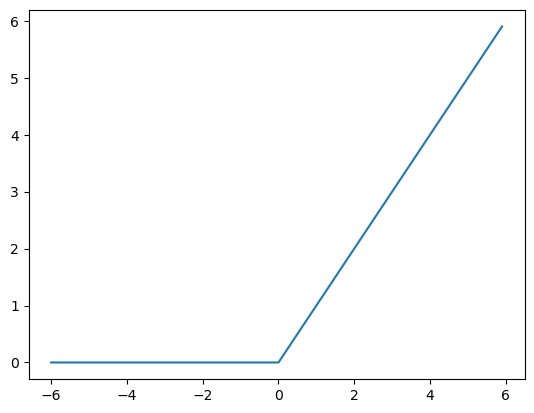

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def relu(x):
    return np.maximum(0, x)  # np.maximumは入力された値から大きいほうを選んで返す関数

x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y, label='ReLU')
plt.show()

# 多次元配列の計算

## 多次元配列

In [4]:
import numpy as np
A = np.array([[1, 2], [3, 4], [5, 6]])  # 2次元配列を作成
print(f"行列：\n{A}")
print(f"n行・m列：{A.shape}")  # (2, 2)
print(f"次元数：{np.ndim(A)}")  # ndimは次元数を返す

行列：
[[1 2]
 [3 4]
 [5 6]]
n行・m列：(3, 2)
次元数：2


## 行列の内積
- 内積は、dot積とも呼ばれる
- 注意
    - 内積(A, B)と内積(B, A)の結果は違うことに注意する
    - 二つの行列A,Bの内積を求めるとき、行列Aの**列数**と行列Bの**行数**を同じにする必要がある


In [ ]:
# 2列2行の行列どうしの内積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(f"A @ B：\n{np.dot(A, B)}")  # 行列の積
print(f"B @ A：\n{np.dot(B, A)}")  # 行列の積

A @ B：
[[19 22]
 [43 50]]
B @ A：
[[23 34]
 [31 46]]


In [ ]:
# 2x3行列と3x2行列の内積
A = np.array([[1, 2, 3], [4, 5, 6]])  # 列数は3
B = np.array([[1, 2], [3, 4], [5, 6]])  # 行数は3
print(f"A @ B：\n{np.dot(A, B)}")  # 行列の積

A @ B：
[[22 28]
 [49 64]]


## ニューラルネットワークの内積

In [ ]:
X = np.array([[1, 2]])  # 1x2行列（入力層）
W = np.array([[1, 3, 5], [2, 4, 6]])  # 2x3行列(重み行列), 出力は列数になる
Y = np.dot(X, W)  # 行列の積（出力層）
print(f"{Y}")  # 行列の積

[[ 5 11 17]]


# ３層ニューラルネットワークの実装

## 各層における信号伝達の実装
### 入力層から中間層1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

input_layer = np.array([1.0, 0.5])  # 入力層(1 x 2行列)
weight1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 重み行列1(2 x 3行列)
bias1 = np.array([0.1, 0.2, 0.3])  # バイアス1(1 x 3行列)

middle_layer1 = np.dot(input_layer, weight1) + bias1  # 行列の積（中間層1）
out_middle_layer1 = sigmoid(middle_layer1)  # シグモイド関数を適用(1 x 3行列)
print(f"sigmoid(output_layer)：\n{out_middle_layer1}")  # シグモイド関数を適用(1 x 3行列)

sigmoid(output_layer)：
[0.57444252 0.66818777 0.75026011]


### 中間層1から中間層2

In [12]:
weight2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 重み行列2(3 x 2行列)
bias2 = np.array([0.1, 0.2])  # バイアス2(1 x 2行列)

middle_layer2 = np.dot(out_middle_layer1, weight2) + bias2  # 行列の積（中間層2）
out_middle_layer2 = sigmoid(middle_layer2)  # シグモイド関数を適用(1 x 2行列)
print(f"sigmoid(output_layer)：\n{out_middle_layer2}")  # シグモイド関数を適用(1 x 2行列)

sigmoid(output_layer)：
[0.62624937 0.7710107 ]


### 中間層2から出力層
- 活性化関数として、「恒等関数」を使用
    - 入力値をそのまま返す

In [15]:
def identify_function(x):  # 恒等関数. 入力値をそのまま返す
    return x

weight3 = np.array([[0.1, 0.3], [0.2, 0.4]])  # 重み行列3(2 x 2行列)
bias3 = np.array([0.1, 0.2])  # バイアス3(1 x 2行列)
_
output_layer = np.dot(out_middle_layer2, weight3) + bias3  # 行列の積（出力層）
out_output_layer = identify_function(output_layer)  # 恒等関数を適用(1 x 2行列)
print(f"identify_function(output_layer)：\n{out_output_layer}")  # 恒等関数を適用(1 x 2行列)

identify_function(output_layer)：
[0.31682708 0.69627909]


### 実装のまとめ

In [21]:
def init_network():
    """
    重みとバイアスの初期化
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 重み行列1(2 x 3行列)
    network['b1'] = np.array([0.1, 0.2, 0.3])  # バイアス1(1 x 3行列)
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 重み行列2(3 x 2行列)
    network['b2'] = np.array([0.1, 0.2])  # バイアス2(1 x 2行列)
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])  # 重み行列3(2 x 2行列)
    network['b3'] = np.array([0.1, 0.2])  # バイアス3(1 x 2行列)
    return network

def forward(network, x):  # forward：入力から出力への伝達処理を表現
    """
    入力信号が出力へと変換されるプロセスがまとまっている関数
    network: 重みとバイアスの辞書
    x: 入力信号(入力層)
    """
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1  # 行列の積（中間層1）
    z1 = sigmoid(a1)  # シグモイド関数を適用(1 x 3行列)
    a2 = np.dot(z1, W2) + b2  # 行列の積（中間層2）
    z2 = sigmoid(a2)  # シグモイド関数を適用(1 x 2行列)
    a3 = np.dot(z2, W3) + b3  # 行列の積（出力層）
    y = identify_function(a3)  # 恒等関数を適用(1 x 2行列)
    return y

network = init_network()  # ネットワークの初期化
x = np.array([1.0, 0.5])  # 入力層(1 x 2行列)
y = forward(network, x)
print(f"出力：{y}")  

出力：[0.31682708 0.69627909]


# 出力層の設計

- ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる
    - 回帰問題：　　
        - ある入力データから連続的な数値の予測を行う問題  
        Ex)  人の写った画像から、その人の体重を予測するような問題
    - 分類問題：
        - データがどのクラスに属するか  
        Ex) 人の写った画像から、その人が男性か女性のどちらであるかを分類


- 分類問題と回帰問題のどちらに用いるかで、出力層の活性化関数を変更する必要がある
    - 回帰問題：恒等関数
    - 分類問題：ソフトマックス関数

## 恒等関数とソフトマックス関数
- 恒等関数：
  - 入力値をそのまま返す
  - 入ってきたものに対して何も手を加えずに出力する
- ソフトマックス関数  
$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$$

In [ ]:
# ソフトマックス関数の実装
a = np.array([0.3, 2.9, 4.0])  # 入力値
exp_a = np.exp(a)  # 指数関数を適用
print(f"exp_a：{exp_a}")  # 指数関数を適用

sum_exp_a = np.sum(exp_a)  # 指数関数の合計
print(f"sum_exp_a：{sum_exp_a}")  # 指数関数の合計

y = exp_a / sum_exp_a  # ソフトマックス関数
print(f"softmax：{y}")  # ソフトマックス関数

def softmax(a):
    """
    ソフトマックス関数
    a: 入力値
    """
    c = np.max(a)  # 最大値を取得
    exp_a = np.exp(a - c)  # 指数関数を適用
    sum_exp_a = np.sum(exp_a)  # 指数関数の合計
    y = exp_a / sum_exp_a  # ソフトマックス関数
    return y

exp_a：[ 1.34985881 18.17414537 54.59815003]
sum_exp_a：74.1221542101633
softmax：[0.01821127 0.24519181 0.73659691]


## ソフトマックス関数の実装上の注意
- オーバーフロー問題
    - 指数関数の計算を行うため、値が大きくなる可能性がある。
    - コンピュータ上では、大きな値どうしで割り算すると数値が不安定になる。  
    -->改善案がある。
$$y_k = \frac{\exp(a_k+C')}{\sum_{i=1}^{n}\exp(a_i+C')}  (Cは任意定数・C'はlogC)$$ 
    
- 今回は、最大値を取得して、すべての値をその分引くことでオーバーフローを対策


In [ ]:
import numpy as np
a = np.array([1010, 1000, 990])  # 入力値
print(np.exp(a) / np.sum(np.exp(a)))  # ソフトマックス関数
# --> [nan nan nan]  # オーバーフローが発生している！！！

print()

# オーバーフロー対策
c = np.max(a)  # 最大値を取得
print(np.exp(a - c) / np.sum(np.exp(a - c)))  # ソフトマックス関数
# --> [9.99954600e-01 4.53978687e-05 0.00000000e+00]  # オーバーフローが発生しない
# 入力信号の最大値を引くことで、オーバーフローを防ぐ

[nan nan nan]

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/tmp/ipykernel_469167/664821675.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))  # ソフトマックス関数
/tmp/ipykernel_469167/664821675.py:3: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))  # ソフトマックス関数


In [4]:
# ソフトマックス関数の実装
import numpy as np
def softmax(a):
    """
    ソフトマックス関数
    a: 入力値
    """
    c = np.max(a)  # 最大値を取得
    exp_a = np.exp(a - c)  # 指数関数を適用
    sum_exp_a = np.sum(exp_a)  # 指数関数の合計
    y = exp_a / sum_exp_a  # ソフトマックス関数
    return y

## ソフトマックス関数の特徴
- ソフトマックス関数の出力は**0~1.0の実数値**になる
- 出力の**総和は1になる**
    - これにより、出力の値を**確率**として使用可能

In [6]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])  # 入力値
y = softmax(a)  # ソフトマックス関数
print(f"softmax：{y}")  # ソフトマックス関数
print(f"合計：{np.sum(y)}")  # 合計

softmax：[0.01821127 0.24519181 0.73659691]
合計：1.0


- 上記の結果から...
    - y[0]：1.8%
    - y[1]：24.5%
    - y[2]：73.7%  
    と判断できる。これより、「2番目のクラスである」という分類が可能
- 注意点：
    - ソフトマックス関数を適用しても、各要素の大小関係は変わらない
    - 実際aの時もindex 2番目の要素が一番大きく、yも同様である。  
    --> ニューラルネットワークで分類の**推論を行う場合は、ソフトマックス関数は省略可能**（学習時には関係しているので注意！！）


## 出力層のニューロンの数
- 出力層のニューロン数は、解くべき問題に応じて適宜決める必要がある。
    - クラス分類の問題：  
    ニューロン数は、**分類したいクラスの数**に設定するのが一般的

# 手書き数字認識

- 手書きで書いた数字（0~9）の分類を行う
- 前提：
    - 学習済み
    - 推論処理部分のみ実装

## MNISTデータセット
- 手書き数字認識のためのデータセットとして**MNIST**を使用
- MNISTデータセット：
    - 0~9までの数字画像から構成
        - 28px × 28pxのグレー画像
        - 各ピクセルは0~255の値をとる（グレー画像のため）
        - それぞれの画像データには、0~9の対応ラベルが振られている。
    - 訓練画像：60,000枚
    - テスト画像：10,000枚

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加(公式のgitから持ってきたMNISTデータセットを使うため)
from deep_learning_from_scratch.dataset.mnist import load_mnist  # MNISTデータセットの読み込み

"""load_mnist()の説明
load_mnist()は、MNISTデータセットを読み込む関数
返り値：[(訓練画像, 訓練ラベル), (テスト画像, テストラベル)]

# 引数
- normalize: Trueにすると、画像の画素値を0~255.0から0.0~1.0に正規化(これを前処理と呼ぶ)
- flaten: Trueにすると、画像を1次元配列に変換(Example: 1x28x28の画像であれば784の要素を持つ1次元配列に変換)
- one_hot_label: Trueにすると、ラベルをone-hotベクトルに変換
    例: 0→[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        1→[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
        ...
"""
(img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=True)  # データセットの読み込み
print(f"学習データ数：{len(img_train)}")  # 学習データ数
print(f"テストデータ数：{len(img_test)}")  # テストデータ数
print(f"学習データの形状：{img_train.shape}")  # 学習データの形状
print(f"テストデータの形状：{img_test.shape}")  # テストデータの形状
print(f"学習ラベルの形状：{label_train.shape}, 1つ目の形状：{label_train[0]}")  # 学習ラベルの形状
print(f"テストラベルの形状：{label_test.shape}, 1つ目の形状：{label_test[0]}")  # テストラベルの形状


学習データ数：60000
テストデータ数：10000
学習データの形状：(60000, 784)
テストデータの形状：(10000, 784)
学習ラベルの形状：(60000, 10), 1つ目の形状：[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
テストラベルの形状：(10000, 10), 1つ目の形状：[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


1つ目の画像のラベル：5
1つ目の画像の形状：(784,)
　⇩1次元配列を2次元配列に変換⇩
1つ目の画像の形状：(28, 28)


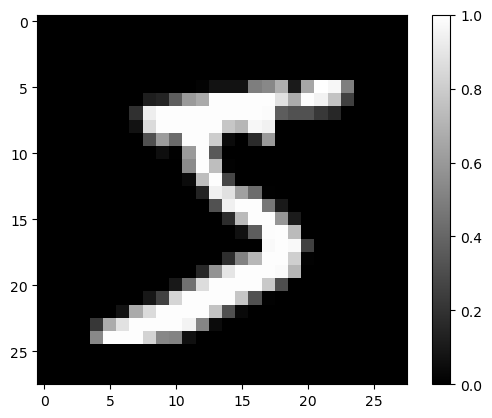

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加(公式のgitから持ってきたMNISTデータセットを使うため)
import numpy as np
from deep_learning_from_scratch.dataset.mnist import load_mnist  # MNISTデータセットの読み込み
import matplotlib.pyplot as plt

def img_show(img):
    """
    画像を表示する関数
    img: 画像データ(1次元配列)
    """
    plt.imshow(img, cmap='gray')  # 画像を表示
    plt.colorbar()  # カラーバーを表示
    plt.show()  # 画像を表示

(img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=False)  # データセットの読み込み
img = img_train[0]  # 1つ目の画像データ
label = label_train[0]  # 1つ目のラベルデータ
print(f"1つ目の画像のラベル：{label}")  # 1つ目の画像のラベル
print(f"1つ目の画像の形状：{img.shape}")  # 1つ目の画像の形状
img = img.reshape(28, 28)  # 1次元配列を2次元配列に変換
print(f"　⇩1次元配列を2次元配列に変換⇩")
print(f"1つ目の画像の形状：{img.shape}")  # 1つ目の画像の形状
img_show(img)  # 画像を表示

## ニューラルネットワークの推論処理
- MNISTデータセットに対して推論処理を行うニューラルネットワークを組む
- ネットワーク：
    - 入力層：28px ×　28pxの784個
    - 出力層：0~9クラス分の10個
    - 中間層（隠れ層）：
        - 1つ目：ニューロン数50個
        - 2つ目：ニューロン数100個

In [3]:
import pickle
import numpy as np

def softmax(a):
    """
    ソフトマックス関数
    a: 入力値
    """
    c = np.max(a)  # 最大値を取得
    exp_a = np.exp(a - c)  # 指数関数を適用
    sum_exp_a = np.sum(exp_a)  # 指数関数の合計
    y = exp_a / sum_exp_a  # ソフトマックス関数
    return y

def sigmoid(x):
    """
    シグモイド関数
    x: 入力値
    """
    return 1 / (1 + np.exp(-x))

def get_data():
    """
    MNISTデータセットを読み込む関数
    """
    (img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=False)  # データセットの読み込み
    return img_test, label_test  # テストデータとテストラベルを返す

def init_network():
    """
    重みとバイアスの初期化
    """
    with open("./deep_learning_from_scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    """
    入力信号が出力へと変換されるプロセスがまとまっている関数
    network: 重みとバイアスの辞書
    x: 入力信号(入力層)
    """
    W1, W2, W3 = network['W1'], network['W2'], network['W3']  # 各層の重み行列,　重み：その値がどれだけ重要かを表す
    b1, b2, b3 = network['b1'], network['b2'], network['b3']  # 各層のバイアス, バイアス：ニューロンが持っている値をコントロールするための値

    a1 = np.dot(x, W1) + b1  # 行列の積（中間層1）
    z1 = sigmoid(a1)  # シグモイド関数を適用(1 x 3行列)
    a2 = np.dot(z1, W2) + b2  # 行列の積（中間層2）
    z2 = sigmoid(a2)  # シグモイド関数を適用(1 x 2行列)
    a3 = np.dot(z2, W3) + b3  # 行列の積（出力層）
    y = softmax(a3)  # ソフトマックス関数を適用(1 x 2行列)
    return y

img_test, label_test = get_data()  # テストデータとテストラベルを取得
network = init_network()  # ネットワークの初期化

accuracy_cnt = 0  # 正解数
for i in range(len(img_test)):  # 5つの画像データを予測
    y = predict(network, img_test[i])  # 1つ目の画像データを予測
    select_label = np.argmax(y)  # 予測結果の最大値を取得
    # print(f"{i+1}つ目の画像データの予測結果：{select_label}, 正解ラベル：{label_test[i]}")  # 1つ目の画像データの予測結果
    if select_label == label_test[i]:
        accuracy_cnt += 1

print()
print(f"正解数：{accuracy_cnt}")  # 正解数
print(f"正解率：{100*(accuracy_cnt / len(img_test)):.3f}%")  # 正解率



正解数：9352
正解率：93.520%


- 処理的なお話・・・
    - init_network：
        - 学習済みの重みパラメータを読み込む
        - ファイルには、重みとバイアスがディクショナリ型で保存されている
    - predict：
        - 入力値を受け取ってニューラルネットワークに通して分類を行う
        - 返り値として、各ラベルの確率がNumPy配列として出力
            - Ex)  
            `[0.1, 0.3, 0.2, 0.001, 0.8, 0.004, 0.005, 0.09]`
            - この場合、index 4が最大値のためラベル4が一番確率が高い
    - 正解率の計算：
        - テストデータをpredictに渡す
        - NumPyのargmax関数を使用して、行列の中で最も大きい値のindex（=ラベル）を返す
        - ラベルが正解ラベルかを調べて、最後に確率を計算

- 上記の結果から、正解率は93.52%であることがわかる！！


## batch処理

- **入力データ**と**重みパラメータ**の形状に注目

In [88]:
test_images, _ = get_data()  # テストデータとテストラベルを取得
network = init_network()  # ネットワークの初期化
W1, W2, W3 = network['W1'], network['W2'], network['W3']  # 各層の重み行列
y = predict(network, img_test[i])

print(f"入力層の形状：{test_images.shape}")  # 入力層の形状
print(f"W1の形状：{W1.shape}")  # W1の形状
print(f"W2の形状：{W2.shape}")  # W2の形状
print(f"W3の形状：{W3.shape}")  # W3の形状
print(f"出力層の形状：{y.shape}")  # 出力層の形状

print(f"in {test_images.shape[1]:03} = w1 ({W1.shape[0]:03}, {W1.shape[1]:03}) = w2 ({W2.shape[0]:03}, {W2.shape[1]:03}) = w3 ({W3.shape[0]:03}, {W3.shape[1]:03}) = out {y.shape[0]:03}") # 入力層のノード数とW1の行数が一致


入力層の形状：(10000, 784)
W1の形状：(784, 50)
W2の形状：(50, 100)
W3の形状：(100, 10)
出力層の形状：(10,)
in 784 = w1 (784, 050) = w2 (050, 100) = w3 (100, 010) = out 010


- 上記より、対応する配列の次元数が一致している。
    - Ex)  
    入力層の列数`784`と重み1の行数`784`  
    重み1の列数`50`と重み2の行数`50`  
    ...  
    重み3の列数`10`と出力層の行数`10`

- この場合は、784の要素からなる1次元配列（画像1枚分）が入力され、10次元の配列が出力されるようになっている。
    

### 画像複数枚をまとめて入力するとき...
- 先ほどの例では、入力が画像1枚分のみであったが今回は100枚入力するときのことを考える。
- 1000枚の入力を行う時、入力層の形状は、`100 ×　784`の行列となる。
- この時、重みの計算は`784`の部分しか使用されない。  
--> 100は出力層にのみ使用すれば良い。
- 出力層のデータの形状は、`100 × 10`の行列で表すことができる
- このように、まとまりの入力データを　**バッチ（batch）**　と呼ぶ
    - batch＝束の意味がある
    - 画像がお札のように束になっているイメージ
    - batchを使用することで、計算量が減りより高速な処理ができる

In [97]:
test_images, test_labels = get_data()  # テストデータとテストラベルを取得
network = init_network()  # ネットワークの初期化

batch_size = 200  # バッチサイズ
accuracy_cnt = 0  # 正解数
for i in range(0, len(test_images), batch_size):  # バッチサイズごとにループ
    x_batch = test_images[i:i+batch_size]  # バッチサイズ分の画像データを取得
    y_batch = predict(network, x_batch)  # 画像データを予測
    p = np.argmax(y_batch, axis=1)  # 予測結果の最大値を取得
    accuracy_cnt += np.sum(p == test_labels[i:i+batch_size])  # 正解数をカウント

print(f"正解数：{accuracy_cnt}")  # 正解数
print(f"正解率：{100*(accuracy_cnt / len(test_images)):.3f}%")  # 正解率

正解数：9352
正解率：93.520%
